In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
}
</style>
""")

# $$\textbf{Python Programming for Machine Learning} $$ 

#### $$\text{SoSe 2021}$$

## $$\text{Lecture 3: Analyzing a dataset, Randomness, Linear Algebra} $$

#### $$\text{Sergej Dogadov, Philine Thalia Görzig, Panagiotis Karagianis}$$

<center>
<img src='images/pyt.png' width=250>

# $$ \textbf{Analyzing a Dataset}$$
<hr> 

* $\text{Let's load the Boston Housing dataset}$ 

$\text{(506 examples composed of 13 features each with prices) from } \textbf{sklearn} \text{ package}.$
<br><br>

<center>
    <img src='./images/sklearn.png' width='500'>

In [2]:
import numpy as np

# conda install -c anaconda scikit-learn
from sklearn.datasets import load_boston

# Load Boston Housing dataset
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
X = boston['data'] # collect the data
print(X.shape)

y = boston['target']
y[:10], len(y)

(506, 13)


(array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9]), 506)

In [4]:
features = boston['feature_names']
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
descriptions = boston['DESCR']
print(descriptions)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## $$ \textbf{Dataset statistics}$$
<hr> 

In [6]:
# Global dataset mean feature value
print(f"Global mean: {X.mean():0.3f}")

# Mean of first feature (CRIM)
print(f"CRIM: {X[:, 0].mean():0.3f}" )

Global mean: 70.074
CRIM: 3.614


In [7]:
#Mean of all features over specific axis
means = X.mean(axis=0).round(3)
stds = X.std(axis=0).round(1)

[print(f"{f}:\t mu {means[n]}\t sigma {stds[n]}" ) for n, f in enumerate(features)];

CRIM:	 mu 3.614	 sigma 8.6
ZN:	 mu 11.364	 sigma 23.3
INDUS:	 mu 11.137	 sigma 6.9
CHAS:	 mu 0.069	 sigma 0.3
NOX:	 mu 0.555	 sigma 0.1
RM:	 mu 6.285	 sigma 0.7
AGE:	 mu 68.575	 sigma 28.1
DIS:	 mu 3.795	 sigma 2.1
RAD:	 mu 9.549	 sigma 8.7
TAX:	 mu 408.237	 sigma 168.4
PTRATIO:	 mu 18.456	 sigma 2.2
B:	 mu 356.674	 sigma 91.2
LSTAT:	 mu 12.653	 sigma 7.1


In [8]:
# Extreme values

print(f"Min value: {X.min()} at position {X.argmin()}")      
print(f"Max value: {X.max()} at position {X.argmax()}") 

Min value: 0.0 at position 3
Max value: 711.0 at position 6353


* $\text{Retain two interesting features (5 and 12 columns)}$

$\quad \quad \quad - \text{RM ->       average number of rooms per dwelling}$

$\quad \quad \quad - \text{LSTAT ->    % lower status of the population}$

In [11]:
print('features:', features[5], features[12])

X_sel = X[:, [5, 12]]
print("X.shape: ", X_sel.shape)

features: RM LSTAT
X.shape:  (506, 2)


###  $$ \textbf{Scatter-plot of the first two dimensions} $$
<hr>

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def plot_data(X, title='Boston Housing data', features=[0, 1]):

    plt.figure(figsize=(12, 12))
    
    x_vals = X[:, features[0]]
    y_vals = X[:, features[1]]
    
    plt.plot(x_vals, y_vals, 'o', color='b', ms=5, label='data') #  X: (506, 2)

    # alternative way with the argument reference

    #plt.scatter(*X_sel.T, color='k', marker='.', s=12)
    x_mean = x_vals.mean().round(2)
    y_mean = y_vals.mean().round(2)
    
    plt.plot(x_mean, y_mean, 'o', color='g', ms=15, label=f'mean ({x_mean}, {y_mean})', zorder=3)
    
    x_min, x_max = x_vals.min(), x_vals.max()
    y_min, y_max = y_vals.min(), y_vals.max()
    
    plt.axis([x_min, x_max, y_min, y_max])
    plt.plot([x_mean, x_mean], [y_min, y_mean], 'k--')
    plt.plot([x_min, x_mean], [y_mean, y_mean], 'k--')
    
    plt.title(title, fontsize=25)
    plt.legend(loc='upper right', fontsize=20)
    
    # return the plot object
    return plt

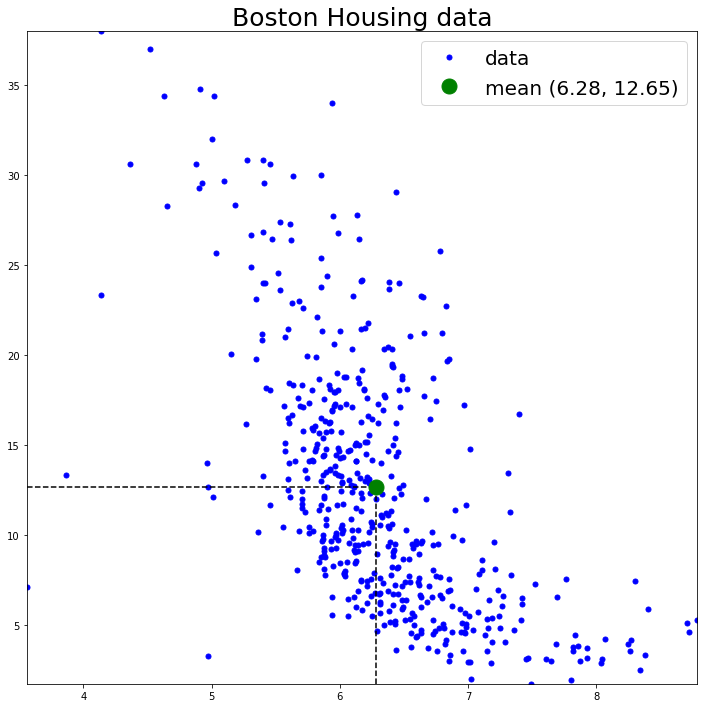

In [23]:
plot_data(X_sel);


###  $$ \textbf{Normalize the data} $$
<hr>

In [24]:
# 506, 2    (2,)
X_norm = X_sel - X_sel.mean(axis=0) # center around origin (zero-mean)

X_norm /= X_sel.std(axis=0)  # rescale features so that they have standard deviation 1 in each dimension

d = X_norm.shape[1]

assert np.allclose(X_norm.mean(0), np.zeros(d))
assert np.allclose(X_norm.std(0), np.ones(d))


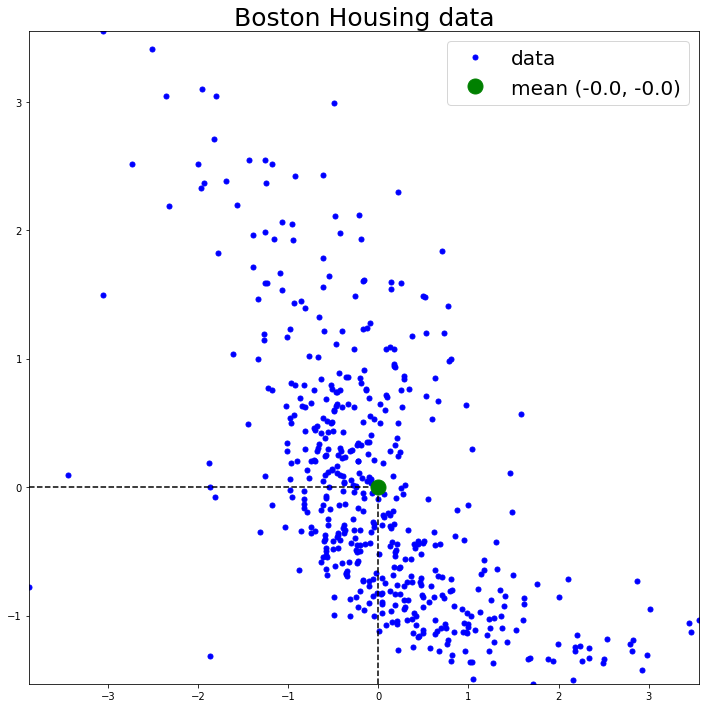

In [25]:
plot_data(X_norm);


###  $$ \textbf{Computing a distance matrix} $$
<hr>

In [26]:
import scipy.spatial

D = scipy.spatial.distance.cdist(X_norm, X_norm, metric='euclidean')
D.shape


(506, 506)

In [27]:
# Using broadcasting

# (506, 1, 2)  -  (1, 506, 2) -> (506, 506, 2)
DD = np.sum( (X_norm[:, None]  - X_norm[None])**2, axis=2)**0.5

assert np.allclose(D, DD)


###  $$ \textbf{ Highlight the neighbouring datapoints} $$
<hr>

In [30]:
def highlight(X, D, min_dist=0.1, title='Boston Housing data'):
    
    plt = plot_data(X)
    idx = np.where(D < min_dist)

    plt.plot(*X.T, 'o', color='b', ms=5)
    plt.title(title, fontsize=20)
    
    for n, (i1, i2) in enumerate(zip(*idx)):
        label = 'neighbours' if n == 0 else None
        plt.plot([X[i1, 0], X[i2, 0]], [X[i1, 1], X[i2, 1]], color='r', alpha=0.55, label=label, linewidth=3)
    
    plt.legend(loc='best', fontsize=20)
    

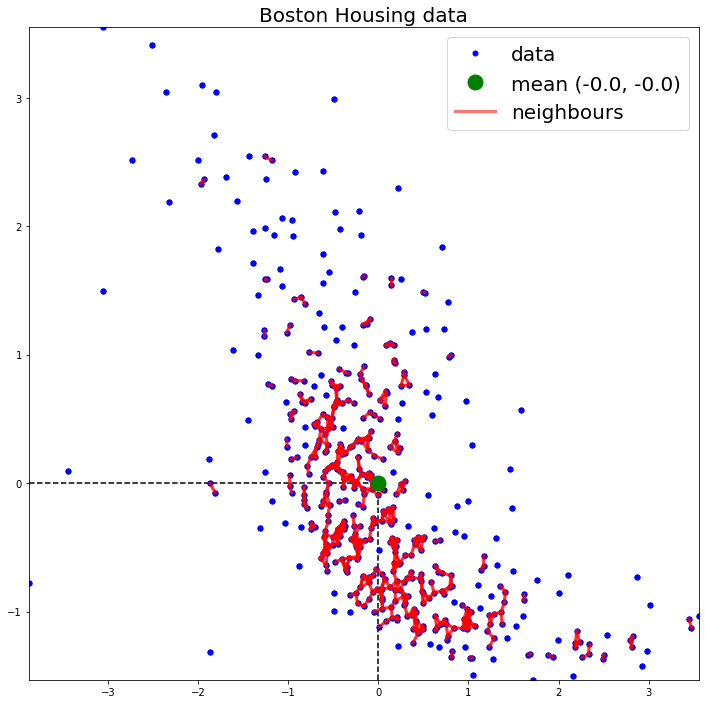

In [31]:
highlight(X_norm, D)


## $$\textbf{K-Nearest Neighbours Regression (KNNR)}$$
<hr>
<br>

In [36]:
# Splitting into train and test data

def split(X, y, tr_ratio=0.8):
    sp_idx = int(tr_ratio * len(X_norm)) # 80% train 20% test

    X_train = X[:sp_idx]
    y_train = y[:sp_idx]

    X_test = X_norm[sp_idx:]
    y_test = y[sp_idx:]
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split(X_norm, y)
X_train.shape, X_test.shape

((404, 2), (102, 2))

In [37]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

knnr = KNNR(n_neighbors=3)
knnr.fit(X_train, y_train)

y_predict = knnr.predict(X_test)

y_predict[:5], y_test[:5] 


(array([14.9       , 13.13333333,  9.66666667, 17.36666667, 14.53333333]),
 array([ 8.5,  5. , 11.9, 27.9, 17.2]))

* $\text{Compute RMSE for the predicted outputs:}$
<hr>

$$\Large{
\text{RMSE} = \sqrt{\frac{1}{N}\sum_{n=1}^N({y}_{\text{te}_n} - y_{\text{pred}_n} )^2}
}$$
<br>

In [38]:
# Root mean square error (RMSE)
rmse = np.mean((y_test - y_predict)**2)**0.5
rmse

4.487869149040631

## $$\textbf{NumPy subpackage for random variables}$$
<hr>
<br>
<center>
    <img src='./images/dice.png' width='500'>

In [39]:
from numpy import random as rnd 


## $$\textbf{Sampling}$$
<hr>
<br>

* $\text{Draw random samples from a uniform distribution.}$

In [40]:
min_value = -1
max_value = 1

number_of_samples = 300

U = rnd.uniform(min_value, max_value, size=number_of_samples) # uniform samples in range (min_value, max_value)

f"Mean: {U.mean():.3f} Variance: {U.var():.2f} Std: {U.std():.2f}"


'Mean: -0.048 Variance: 0.33 Std: 0.57'

* $\text{Visualize 1-dim samples.}$

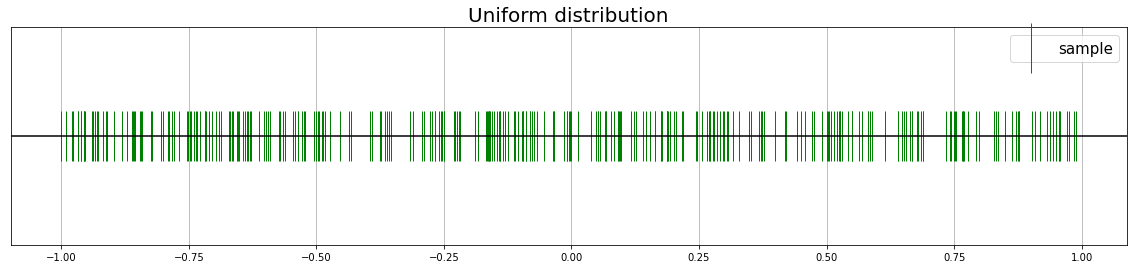

In [41]:
plt.figure(figsize=(20,4))
plt.title('Uniform distribution', fontsize=20)

plt.plot(U, np.zeros_like(U), '|', c='g', ms=50, label='sample')

plt.axhline(y = 0, color='k')
plt.grid(axis='x')

plt.legend(fontsize=15)
plt.yticks([]);

## $$\textbf{ Represent samples using the histogram plot}$$
<hr>
<br>

(array([14.,  9., 10., 12., 12., 13., 11., 11.,  3.,  8.,  6., 12., 15.,
        15.,  8.,  9., 13., 12.,  8., 13.,  7.,  6.,  9., 14.,  6.,  8.,
        11.,  6.,  8., 11.]),
 array([-0.99984257, -0.93355079, -0.867259  , -0.80096721, -0.73467543,
        -0.66838364, -0.60209186, -0.53580007, -0.46950828, -0.4032165 ,
        -0.33692471, -0.27063293, -0.20434114, -0.13804935, -0.07175757,
        -0.00546578,  0.060826  ,  0.12711779,  0.19340958,  0.25970136,
         0.32599315,  0.39228493,  0.45857672,  0.52486851,  0.59116029,
         0.65745208,  0.72374386,  0.79003565,  0.85632743,  0.92261922,
         0.98891101]))

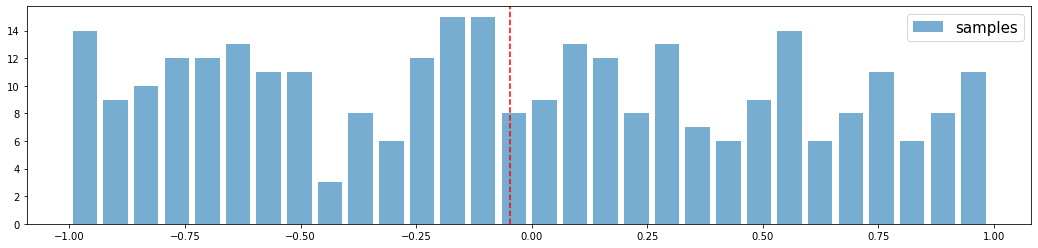

In [46]:
plt.figure(figsize=(18, 4))

nums, borders, _ = plt.hist(U, bins=30, rwidth=0.8, alpha=0.6, label='samples', density=False) # num of bins, block width percentage

plt.axvline(x=U.mean(), ls='--', c='r') # plot dashed mean line
plt.legend(fontsize=15);

nums, borders


In [47]:
def calc_area(nums, borders):
    vals = borders[1:] - borders[:-1]
    area = np.sum(vals * nums)
    return area

calc_area(nums, borders) # enable density to get 1

19.887535777653024

## $$\textbf{Univariate-normal (Gaussian) distribution}$$
<hr>
<br>

In [ ]:
# fix the random seed for debuging
np.random.seed(42)  # any value

In [ ]:
mean = 2
std = 8
X = rnd.normal(loc=mean, scale=std, size=500)

f'Mean: {X.mean():.3f} Variance: {X.var():.2f} Std: {X.std():.2f}'

In [ ]:
plt.figure(figsize=(12,8))

nums, borders, _ = plt.hist(X, bins=50, density=True, alpha=0.8, rwidth=0.8, color='g')
assert np.isclose(calc_area(nums, borders), 1)

from seaborn import kdeplot

kdeplot(X,linewidth=2, color='g') #
plt.title('Density estimation plot', fontsize=20)
plt.axvline(X.mean(), ls='--', c='r');

## $$\textbf{Multiple Gaussian distribution}$$
<hr>
<br>

In [ ]:
means = [-10, 0, 10]
stds = [2, 5, 3]
assert len(means) == len(stds)
n_clusters = len(means)

fig = plt.figure(figsize=(12,8))

from matplotlib import cm
cmap = cm.get_cmap('gist_rainbow')
rgba_values = cmap(np.arange(n_clusters) / n_clusters) # red, green, blue, alpha

for n in range(n_clusters): # given additionaly a counter back
    
    data = rnd.normal(means[n], stds[n], size=500)
    
    color = rgba_values[n]
    
    plt.hist(data, bins=20, color=color, alpha=0.55, rwidth=0.8, density=True)
    kdeplot(data, color=color, alpha=0.7)
    
plt.title('Gaussian histogram plots', fontsize=25);    

### $$\textbf{Gaussian histogram plot with subplots}$$
<hr>

In [ ]:
def plot_gaussians(means, stds, size=250, bins=25):
    N = len(means)
    M = len(stds)
    
    fig, axis = plt.subplots(nrows=N, ncols=M, sharey=True, figsize=(20, 14))

    R,C = axis.shape

    for r in range(R):
        for c in range(C):
            ax = axis[r,c]
            
            data = rnd.normal(means[r],stds[c], size=size)
            
            ax.hist(data, bins=bins, rwidth=0.8, density=True, color='g', alpha=0.5, label='data')
            ax.axvline(data.mean(), ls='--', c='r', ymax=.8, label='$\\mu =$'+f'{data.mean():0.2f}')
            
            ax.set_xticks(means) # plt.xticks([...])
            ax.legend(fontsize=15)
            ax.grid(axis='y')
            
            kdeplot(data, ax=ax, color='k')
            
    ttl = axis[0,1].set_title('Gaussian histogram plots', fontsize=25)

In [ ]:
plot_gaussians(means, stds)

## $$\textbf{Probability density function}$$
<hr>
<br>

* $\text{Gaussian PDF}$

$$\boxed{\small{\mathcal{N}(x | \mu, \sigma)} = 
\frac{1}{\sigma\sqrt{2\pi}}\exp{\Big(-\frac{(x - \mu)^2}{2\sigma^2}\Big)}}$$

In [ ]:
def gauss_pdf(X, mu=0, sigma=1):
    #                                           (N,d) - (1,d) = (N,d)
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(X - mu)**2/(2*sigma**2))

In [ ]:
mean = 2
std = 4
X = np.sort(rnd.normal(loc=mean, scale=std, size=20000))

g_pdf = gauss_pdf(X, mean, std)
print(g_pdf.shape)

In [ ]:
from scipy.stats import norm

n_pdf = norm.pdf(X, loc=mean, scale=std)
assert np.allclose(g_pdf, n_pdf)

## $$\textbf{Multinomial distribution}$$
<hr>

* $\text{Let's draw some random samples from a multinomial distribution. We'll use our fruits from the first lecture.}$
<br>
<center>
    <img src='./images/fruits.png', width='900'>

In [ ]:
fruits = np.array([
    'watermelon',
    'apple',
    'grape',
    'grapefruit',
    'lemon',
    'banana',
    'cherry'
])

## $$\textbf{Sample from multinomial}$$
<hr>

In [ ]:
n = 5 # number of samples

p = np.ones(len(fruits))/len(fruits) # represents equal sampling probability

print(p)

all_fruits = np.tile(fruits, (n,1)) # repeat multiple (5) times to represent all possible picks
print(all_fruits)

print(50 * '--')

mlt = rnd.multinomial(1, p, size=(5)) # draw multinomial samples 5 times with the given probability
print(mlt)

mlt = mlt.astype(bool)
print(mlt)

samples = all_fruits[mlt] # select drown samples from all fruits


In [ ]:
list(samples)


## $$\textbf{Adjust selection probabilities}$$
<hr>

In [ ]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05] # new probailities to pick a fruit
n = 100

all_fruits = np.tile(fruits, (n,1))

mlt = rnd.multinomial(1, p, size=(n)) # draw multinomial samples 5 times with given probabilities
#print(mlt) # mask as 0 or 1 ints

samples = all_fruits[mlt.astype(bool)] # show drown samples
#print(list(samples))

np.mean(mlt.astype(bool), 0)

## $$\textbf{ Another way to make discrete choices}$$
<hr>

<center>
    <img src='./images/sampling.png', width='900'>

In [ ]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05]

temp = [0] + p[:-1]
print(temp)

# Cumulate them
l = np.cumsum(temp) # lower-bounds
h = np.cumsum(p)    # upper-bounds

print(l)
print(h)

# Draw uniformly a number between 0 and 1
u = np.random.uniform(0, 1)

# Find which basket it belongs to
s = (u >= l) * (u < h) # np.logical_and(u > l, u < h) 

print(s) # sampled basket as a mask
# retrieve the label
fruits[np.argmax(s)]

## $$\textbf{Linear Algebra}$$
<hr>
<br> 


#### $\textbf{Many machine learning techniques are based on linear algebra.}$ 

<br>

* $\text{Trace operator and matrix norms}$ 
<br>

* $\text{Solving a system of linear equations}$
<br>

* $\text{Singular value decomposiotion}$

## $$\textbf{Trace operator}$$
<hr>
<br> 

$$\Large{ 
tr(X) = \sum_{i=1}^N X_{ii}, \quad X \in \mathbb{R}^{(N,M)}
}$$
<hr>

* $\text{Usefull Properties}$:

$$\Large{ 
a = tr(a),\quad a \in \mathbb{R} 
}$$

$$\Large{ 
tr(A) + tr(B) = tr( A + B)
}$$

$$\Large{ 
tr(ABC) = tr(CAB) = tr(BCA) 
}$$

In [23]:
from numpy import random as rnd
X = rnd.normal(0, 1, size=(50,50)) #.reshape((50,50))
assert np.diag(X).sum() == np.trace(X)

In [24]:
a = 10

A = rnd.normal(0, 1, (10,20))
B = rnd.normal(0, 1, (20,10))
C = rnd.normal(0, 1, (10,10))

assert a == np.trace([[a]]) # scalar

assert np.allclose(np.trace(A) + np.trace(B.T), np.trace(A + B.T)) 

assert np.allclose(np.trace(A @ B @ C),np.trace(C @ A @ B)) # A.dot(B) 
assert np.allclose(np.trace(C @ A @ B),np.trace(B @ C @ A))


## $$\textbf{Matrix norms}$$
<hr>
<br>  

* $\text{Frobenius norm with trace operator:}$

$$\Large{
|| X ||_{Fro} = \sqrt{tr(XX^{\top})}
}$$

In [25]:
l2_Fro = lambda X: np.trace(X @ X.T)**0.5


In [26]:
import numpy.linalg as la

X = rnd.normal(0,1, size=(10,20))

assert np.allclose(l2_Fro(X), la.norm(X, ord='fro')) # ord = {'inf', 'nuc', p-norm }

## $$\textbf{Sum of row vectors with Trace}$$
<hr>

$$\Large{X \in \mathbb{R}^{(N,D)} }$$

$$\Large{
y = \sum_{n=1}^N x_{n} x_n^{\top} = {\sum_{n=1}^N tr(x_n^{\top}x_n)} = tr{(X^{\top} X)}
}$$

In [27]:
X = rnd.normal(0,1, size=(10,20))

y = np.sum( [x @ x.T for x in X] )

print(y, np.trace(X.T @ X))

np.allclose(y, np.trace(X.T @ X), atol=1e-9)


175.81793069715866 175.81793069715866


True

## $$\textbf{Solving a system of linear equations}$$
<hr>

$\text{Like}$
$$\Large{
3x_0 + x1 = 9, \quad x_0 + 2x_1 = 8
}$$

$\text{or}$

$$\Large{ 
A X = B, \quad A = [[3,1],[1,2]] \quad B = [9,8]}$$

In [28]:
A = [
        [3, 1],
        [1, 2]
    ]

B = [9, 8]

X = la.solve(A, B)

print(B, A @ X)

assert np.allclose(A @ X, B)


[9, 8] [9. 8.]


## $$\textbf{Linear regression}$$
<hr>

$$\Large{ 
y = \beta_1 * \hat{X} + \beta_2 + \mathcal{E}
}$$

$$\textbf{Matrix form}$$
<hr>
$$\Large{
y = [ \beta_1, \beta_2 ] \times [ \hat{X} , \mathbb{1}_{N}]^{\top} + \mathcal{E}
}$$
<hr>
$$\Large{
y = \beta \times {X}^{\top} + \mathcal{E}, \quad \text{where} \quad \beta = [\beta_1,\beta_2] \in \mathbb{R}^{(1,2)}, \quad \text{and} \quad X = [ \hat{X} , \mathbb{1}_{N}] \in \mathbb{R}^{(N,2)}
}$$
<br>

$\textbf{Task}:\> \text{Find the best linear fit of a labeled dataset.}$

## $$\textbf{Toy data generation}$$
<hr>


(200, 2) (200,)


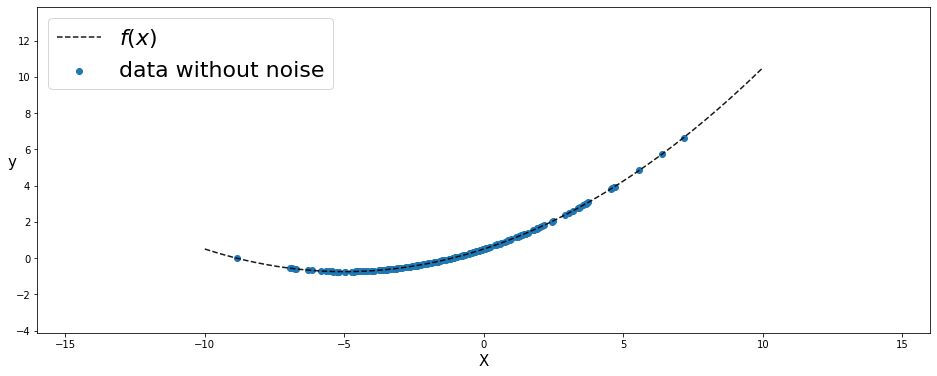

In [90]:
# Create a dataset
rnd.seed(42)
N = 200 # number of data points

X = np.random.normal(-1, 3, size=N)

# Targets (outputs) depend on X in some way
f = lambda x: 0.5 * x + 0.05 * x ** 2 + 0.5

y = f(X)

X = np.c_[(X, np.ones_like(X))] # column-wise concatenation np/c_[((250, 1) ,(250,1))] np.hstack

print(X.shape, y.shape)

X_range = np.linspace(-10, 10, 500)

plt.figure(figsize = (16,6))
plt.scatter(X[:, 0], y, label='data without noise')
plt.plot(X_range, f(X_range), 'k--', alpha=0.9, label='$f(x)$')

plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15, rotation=0);
plt.legend(fontsize=22)
plt.margins(0.3)


* $\textbf{Add some random noise}\> \mathcal{E}_n \sim \mathcal{N}(0, \sigma^2)$

(200,)
(200,)


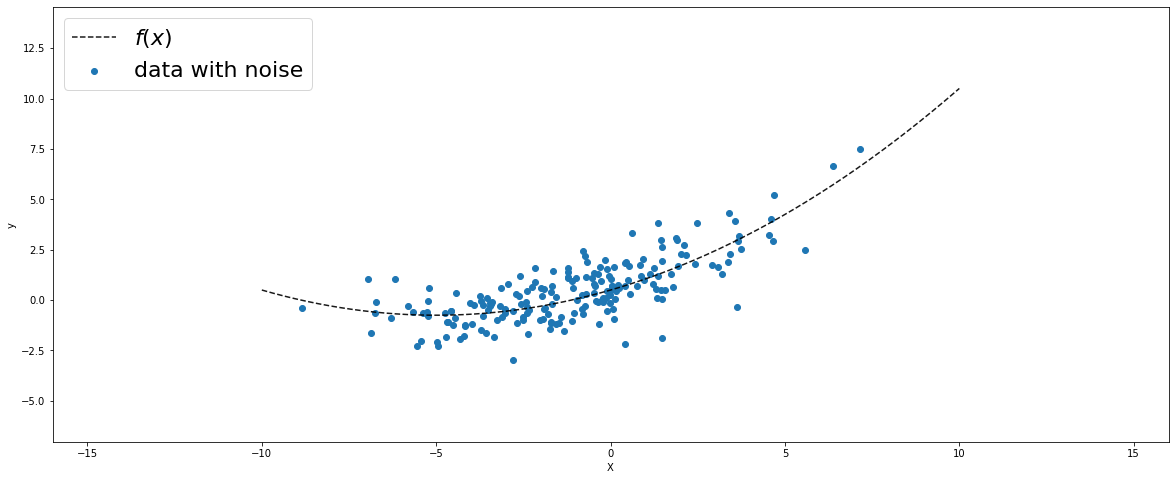

In [89]:
sigma2 = 0.5

Eps = np.random.normal(loc=0, scale=sigma2, size=len(y)) # random noise
print(Eps.shape)

y += Eps # add noise to the targets
print(y.shape)

plt.figure(figsize = (20,8))
plt.scatter(X[:, 0], y, label='data with noise')
plt.plot(X_range, f(X_range), 'k--', alpha=0.9, label='$f(x)$')

plt.legend(fontsize=22)
plt.xlabel('X')
plt.ylabel('y')
plt.margins(0.3)



### $$\text{Split dataset randomly into } \textbf{train} \text{ and } \textbf{test } \text{datasets}$$
<hr>

In [80]:
# Use a function from sklearn package

from sklearn.model_selection import train_test_split

tr_ratio = 0.2 # percentage 

X_tr, X_te, y_tr, y_te = train_test_split(X, y, 
                                          test_size=1-tr_ratio, 
                                          random_state=42)


## $$\textbf{Linear regeression analytic solution}$$
<hr>

* $\text{The solution of the linear regression model is given by:}$
<hr>

$$\Large{\boxed{\beta = (X_\text{tr}^\top X_\text{tr})^{-1} X_\text{tr}^\top y_\text{tr}}}$$

* $\text{And the prediction for new "test" points by:}$
<hr>

$$\Large{\hat y_\text{te} = X_\text{te} \beta}$$

In [81]:
beta = la.inv(X_tr.T @ X_tr) @ X_tr.T @ y_tr

y_te_predict = X_te @ beta

beta


array([0.37844216, 0.9788175 ])

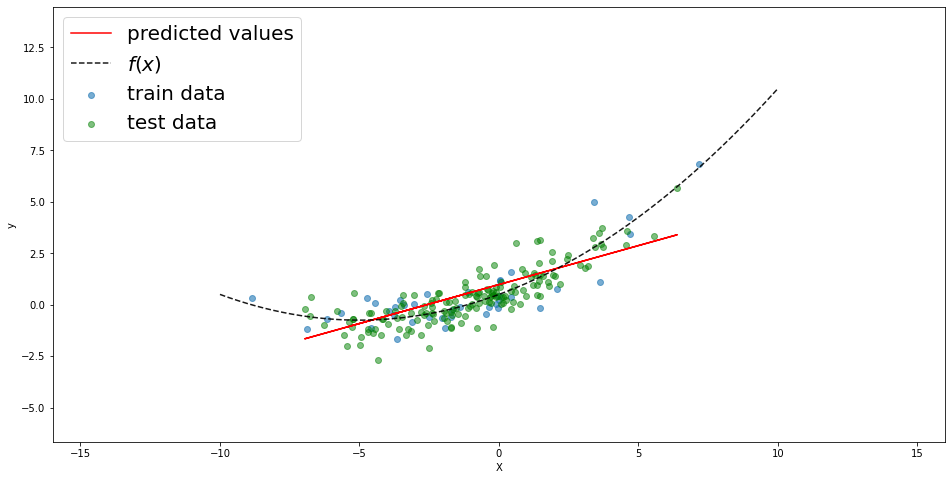

In [88]:
# Plot the data and the prediction
plt.figure(figsize = (16,8))
plt.scatter(X_tr[:, 0], y_tr, alpha=.6, label='train data')
plt.scatter(X_te[:, 0], y_te, color='g', alpha=.5, label='test data')
plt.xlabel('X')
plt.ylabel('y')

plt.plot(X_te[:, 0], y_te_predict, '-', color='r', label='predicted values')
plt.plot(X_range, f(X_range), 'k--', alpha=0.9, label='$f(x)$')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(fontsize=20)
plt.margins(0.3)


In [91]:
rmse = np.square(y_te_predict - y_te).mean()**0.5

f"RMSE: {rmse:0.2f} where y_tr std: {np.std(y_tr):0.3f}"


'RMSE: 0.79 where y_tr std: 1.670'

## $$\textbf{Principal component analysis (PCA)}$$
<hr>



$\text{PCA is a technique widely used for applications such as}$

 * $\text{dimensionality reduction}$
 * $\text{lossy data compression}$
 * $\text{feature extraction}$
 * $\text{data visualization}$

$\text{There are two commonly used definitions of PCA:}$

 * $\text{Orthogonal projection onto lower dimensional linear space
    such that the variance of projected data is maximized.}$
    
 * $\text{Linear projection that minimizes the average projection}$
    $\text{cost, defined as the mean squared distance between the
    data and their projections.}$

## $$\textbf{Singular value decomposition (SVD)}$$
<hr>


$\text{The Singular-Value Decomposition, or SVD for short,}$

$\text{is a matrix decomposition method for reducing a matrix to its constituent parts}$

$\text{in order to make e.g. certain subsequent matrix calculations like matrix inversion simpler.}$

<br><br>

<center>
    <img src="./images/SVD.png" width='600'/>

## $$\textbf{Create a random dataset with correlated feature dependency}$$
<hr>

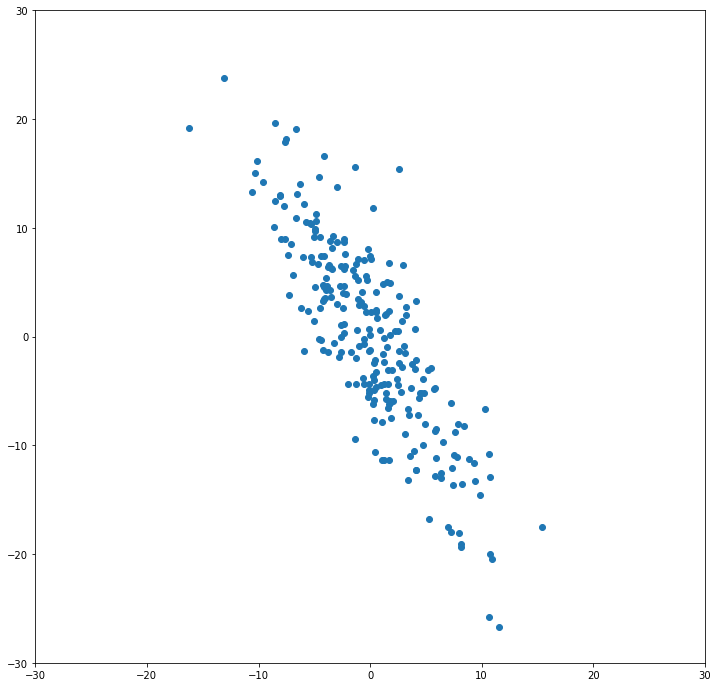

In [93]:
rnd.seed(42)
N = 250
M = np.random.normal(0, 5, (N, 2))

# create some correlation between dimensions
M[:, 1] -= 1.5 * M[:, 0]

# Plot the centered dataset
plt.figure(figsize=(12, 12))
plt.scatter(*M.T)

plt.axis([-30, 30, -30, 30]);


## $$\textbf{Find the principal components via SVD}$$
<hr>


In [95]:
# PCA only applies to centered data, so we center the data
M -= M.mean(axis=0)

U, Sigma, V = la.svd(M, full_matrices = False)

print(Sigma)
print("U shape: ", U.shape)
print("Sigma shape:", Sigma.shape)
print("V shape:", V.shape)

X = U @ np.diag(Sigma) @ V.T # SVD reconstruction

assert np.allclose(np.sum(M - X) , 0)


[155.77368067  38.53191893]
U shape:  (250, 2)
Sigma shape: (2,)
V shape: (2, 2)


## $$\textbf{Project any point to the axis representing highest data variance}$$
<hr>


In [100]:
HAT_1 = np.outer(V[0], V[0]) # 1st component
HAT_2 = np.outer(V[1], V[1]) # 2d component

M_test = rnd.uniform(-20, 20, size=(500, 2)) # random test data to project

# Project some test data onto the fisrt principal compenent
M_test_PCA_1 = M_test @ HAT_1

# Project some test data onto the second principal compenent
M_test_PCA_2 = M_test @ HAT_2


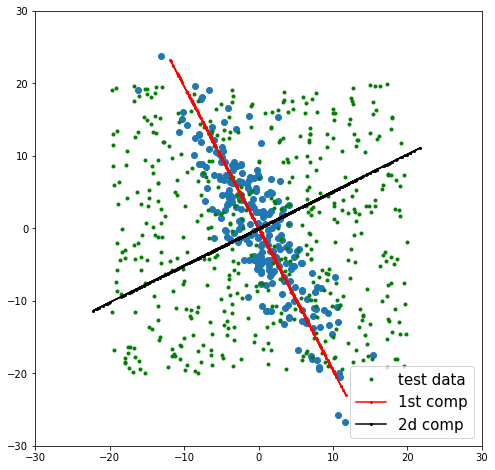

In [101]:
# Plot the original data and the projected test data
plt.figure(figsize=(8, 8))

plt.scatter(*M.T)  # equivalent to M.T[0], M.T[1]

plt.plot(*M_test.T, '.', color='g', label='test data')
plt.plot(*M_test_PCA_1.T, 'o-', color='r', ms=2, label='1st comp')
plt.plot(*M_test_PCA_2.T, 'o-', color='k', ms=2, label='2d comp')

plt.legend(fontsize=15)
plt.axis([-30, 30, -30, 30])


## $$\textbf{Sklearn PCA}$$
<hr>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(M) # N, 100
print(Mtest.shape)

M_pr = pca.transform(Mtest)
M_pr.shape

## $$\textbf{Thank you for your attention.}$$